<a href="https://colab.research.google.com/github/briandk/2020-virtual-program-in-data-science/blob/master/incarceration_trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
from plotnine import *

In [2]:
incarcerations = pd.read_csv("https://github.com/briandk/2020-virtual-program-in-data-science/raw/master/data/incarceration_trends.csv")

Let's see what kind of data we're working with.

In [3]:
incarcerations

,yfips,year,fips,state,county_name,total_pop,total_pop_15to64,female_pop_15to64,male_pop_15to64,asian_pop_15to64,black_pop_15to64,latino_pop_15to64,native_pop_15to64,other_pop_15to64,white_pop_15to64,urbanicity,region,division,commuting_zone,metro_area,land_area,total_jail_adm,total_jail_adm_dcrp,female_jail_adm_dcrp,male_jail_adm_dcrp,total_jail_pop,female_jail_pop,male_jail_pop,asian_jail_pop,black_jail_pop,latino_jail_pop,native_jail_pop,white_jail_pop,total_jail_pretrial,female_jail_pretrial,male_jail_pretrial,jail_from_state_prison,jail_from_other_state_prison,jail_from_state_jail,jail_from_other_state_jail,jail_from_fed,jail_from_ice,total_jail_pop_dcrp,female_jail_pop_dcrp,male_jail_pop_dcrp,total_prison_pop,female_prison_pop,male_prison_pop,asian_prison_pop,black_prison_pop,latino_prison_pop,native_prison_pop,other_prison_pop,white_prison_pop,total_prison_adm,female_prison_adm,male_prison_adm,asian_prison_adm,black_prison_adm,latino_prison_adm,native_prison_adm,other_prison_adm,white_prison_adm,num_facilites,num_employees,confined_pop,capacity,ucr_population,index_crime,violent_crime,property_crime,murder_crime,rape_crime,robbery_crime,agr_assault_crime,burglary_crime,larceny_crime,mv_theft_crime,arson_crime
0,197001001,1970,1001,AL,Autauga County,24661,14154,7293,6861,NaN,3413,NaN,NaN,15.0,10726,small/mid,South,East South Central,60.0,33860.0,594.449,0.0000,NaN,NaN,NaN,0.000,0.000,0.00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,197101001,1971,1001,AL,Autauga County,25503,14765,7585,7180,NaN,3451,NaN,NaN,24.0,11290,small/mid,South,East South Central,60.0,33860.0,594.449,0.0000,NaN,NaN,NaN,0.000,0.000,0.00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,197201001,1972,1001,AL,Autauga County,27156,15939,8168,7771,NaN,3625,NaN,NaN,31.0,12283,small/mid,South,East South Central,60.0,33860.0,594.449,0.0000,NaN,NaN,NaN,0.000,0.000,0.00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,197301001,1973,1001,AL,Autauga County,28453,16906,8651,8255,NaN,3747,NaN,NaN,41.0,13118,small/mid,South,East South Central,60.0,33860.0,594.449,0.0000,NaN,NaN,NaN,0.000,0.000,0.00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,197401001,1974,1001,AL,Autauga County,29261,17578,8992,8586,NaN,3791,NaN,NaN,49.0,13738,small/mid,South,East South Central,60.0,33860.0,594.449,0.0000,NaN,NaN,NaN,0.000,0.000,0.00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147528,201256045,2012,56045,WY,Weston County,7141,4662,2098,2564,17.0,29,171.0,65.0,NaN,4380,rural,West,Mountain,445.0,NaN,2398.005,247.6607,124.0,25.0,99.0,5.625,1.625,8.75,0.0,0.0,3.0,0.0,10.0,2.5,6.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0,5.0,17.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,16.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,59.0,186.0,222.0,6111.0,96.0,5.0,91.0,0.0,1.0,0.0,4.0,10.0,76.0,5.0,0.0
147529,201356045,2013,56045,WY,Weston County,7074,4584,2055,2529,21.0,48,186.0,72.0,NaN,4257,rural,West,Mountain,445.0,N

What if we look at overall incarcerations over time?

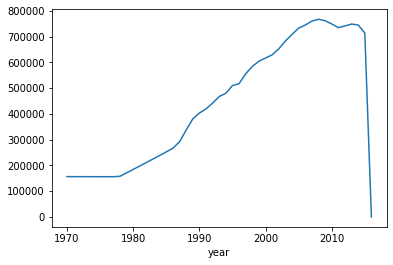

In [12]:
incarcerations['timestamp'] = pd.to_datetime(incarcerations['year'], infer_datetime_format = True)

incarcerations.groupby('year').sum()['total_jail_pop'].plot()

What happens if we break the data down by year, and by state?

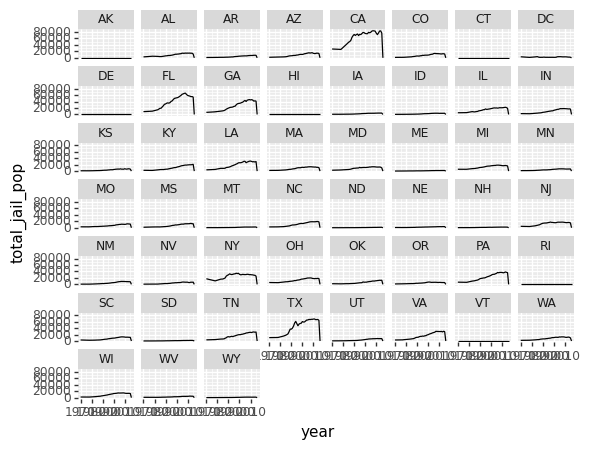

<ggplot: (8774387991630)>

In [26]:
by_year_by_state = (
  incarcerations
    .groupby(['year', 'state'])
    .sum()
    .reset_index(level = ['year', 'state'])
)

(
    ggplot(
        aes(
            x = 'year',
            y = 'total_jail_pop'
        ),
        data = by_year_by_state
    ) +
    geom_line() +
    facet_wrap('~ state')
)

Something seems to be weird about the most recent numbers. There's a really rapid drop-off.

In [34]:
by_year_by_state.tail()[['year', 'state', 'total_jail_pop']]

,year,state,total_jail_pop
2392,2016,VT,0.0
2393,2016,WA,0.0
2394,2016,WI,0.0
2395,2016,WV,0.0
2396,2016,WY,0.0


It doesn't seem likely that absolutely no one was in prison in the entire states of Vermont, Washington, Wisconsin, West Virginia, or Wyoming.

What if we filter the data to exclude 2016?

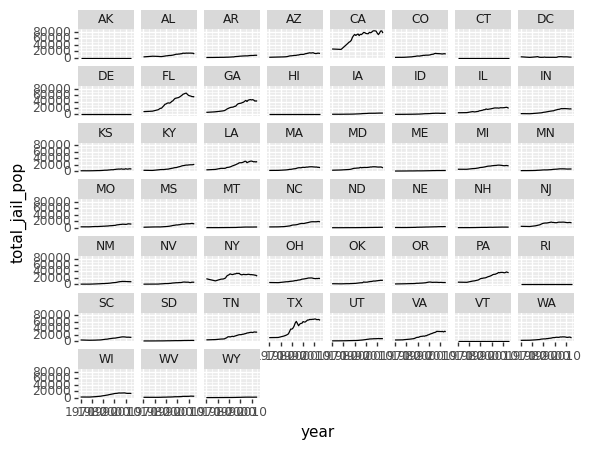

<ggplot: (-9223363262471639029)>

In [36]:
by_year_by_state = by_year_by_state[by_year_by_state['year'] < 2016]

(
    ggplot(
        aes(
            x = 'year',
            y = 'total_jail_pop'
        ),
        data = by_year_by_state
    ) +
    geom_line() +
    facet_wrap('~ state')
)

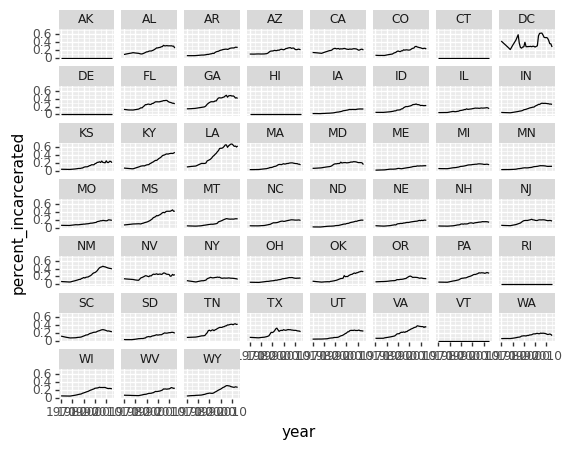

<ggplot: (8774386251910)>

In [41]:
percent_incarcerated = (
  by_year_by_state['total_jail_pop'] / 
  by_year_by_state['total_pop'] *
  100
)

by_year_by_state = by_year_by_state.assign(percent_incarcerated = percent_incarcerated)

by_year_by_state[['percent_incarcerated']]
(
    ggplot(
        aes(
            x = 'year',
            y = 'percent_incarcerated'
        ),
        data = by_year_by_state
    ) +
    geom_line() +
    facet_wrap('~ state')
)

It seems like even when we adjust incarceration rates to be per capita, the general trend is that incarceration rates are growing over time.

What happens if we compare by race?

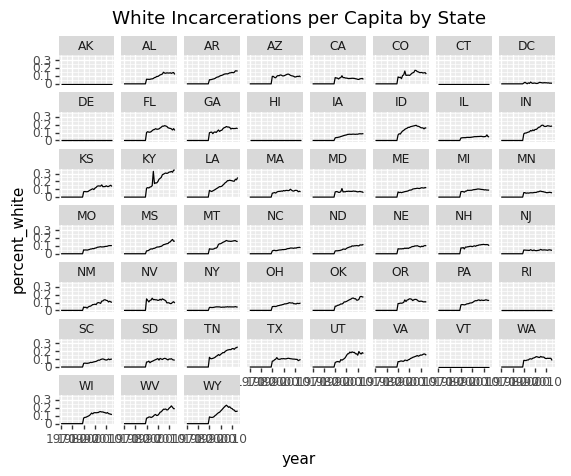

<ggplot: (8774382809962)>

In [62]:
percent_black = (
    by_year_by_state['black_jail_pop'] /
    by_year_by_state['total_pop'] *
    100            
)

percent_white = (
    by_year_by_state['white_jail_pop'] /
    by_year_by_state['total_pop'] *
    100
)

by_year_by_state = by_year_by_state.assign(percent_white = percent_white)
by_year_by_state = by_year_by_state.assign(percent_black = percent_black)

by_year_by_state[['percent_black', 'percent_white']]

(
    ggplot(
        aes(
            x = 'year',
            y = 'percent_white'
        ),
        data = by_year_by_state
    ) +
    geom_line() +
    facet_wrap('~ state') +
    ggtitle("White Incarcerations per Capita by State")
)

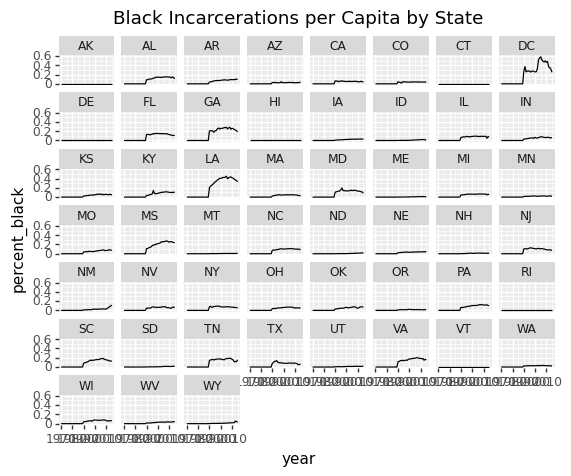

<ggplot: (8774382250707)>

In [63]:
(
    ggplot(
        aes(
            x = 'year',
            y = 'percent_black'
        ),
        data = by_year_by_state
    ) +
    geom_line() +
    facet_wrap('~ state') +
    ggtitle('Black Incarcerations per Capita by State')
)

Look at the spike in cases in DC, Louisiana, Mississippi, South Carolina, Tennessee, etc.



Let's look at just the cases in DC

In [54]:
by_year_by_state[by_year_by_state['state'] == 'DC'][['year', 'black_jail_pop']].tail()

,year,black_jail_pop
2098,2011,2923.0
2149,2012,2270.0
2200,2013,2233.0
2251,2014,2038.0
2302,2015,1645.0


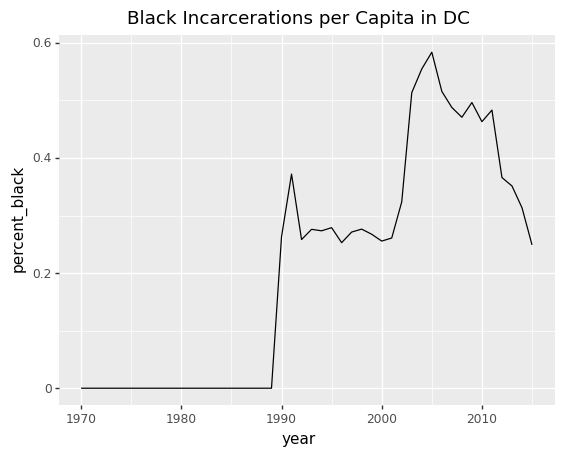

<ggplot: (-9223363262472991414)>

In [67]:
(
    ggplot(
        aes(
            x = 'year',
            y = 'percent_black'
        ),
        data = by_year_by_state[by_year_by_state['state'] == 'DC']
    ) +
    geom_line() +
    ggtitle('Black Incarcerations per Capita in DC')
)

Maybe it's possible that prior to 1989 or so, there weren't separate statistics for white and black prison populations.

Even so, look a that spike between 2000 and 2005. What happened?

In [68]:
by_year_by_state

,year,state,yfips,fips,total_pop,total_pop_15to64,female_pop_15to64,male_pop_15to64,asian_pop_15to64,black_pop_15to64,latino_pop_15to64,native_pop_15to64,other_pop_15to64,white_pop_15to64,commuting_zone,metro_area,land_area,total_jail_adm,total_jail_adm_dcrp,female_jail_adm_dcrp,male_jail_adm_dcrp,total_jail_pop,female_jail_pop,male_jail_pop,asian_jail_pop,black_jail_pop,latino_jail_pop,native_jail_pop,white_jail_pop,total_jail_pretrial,female_jail_pretrial,male_jail_pretrial,jail_from_state_prison,jail_from_other_state_prison,jail_from_state_jail,jail_from_other_state_jail,jail_from_fed,jail_from_ice,total_jail_pop_dcrp,female_jail_pop_dcrp,male_jail_pop_dcrp,total_prison_pop,female_prison_pop,male_prison_pop,asian_prison_pop,black_prison_pop,latino_prison_pop,native_prison_pop,other_prison_pop,white_prison_pop,total_prison_adm,female_prison_adm,male_prison_adm,asian_prison_adm,black_prison_adm,latino_prison_adm,native_prison_adm,other_prison_adm,white_prison_adm,num_facilites,num_employees,confined_pop,capacity,ucr_population,index_crime,violent_crime,property_crime,murder_crime,rape_crime,robbery_crime,agr_assault_crime,burglary_crime,larceny_crime,mv_theft_crime,arson_crime,percent_incarcerated,percent_black,percent_white
0,1970,AK,5910064610,64610,255117,163490,72689,90801,0.0,5807,0.0,0.0,19966.0,137717,17405.0,100820.0,570886.133,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,941.0,4146.0,4129.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,1970,AL,13199071489,71489,3454557,2108268,1095993,1012275,0.0,493794,0.0,0.0,3955.0,1610519,14746.0,1042840.0,50646.736,0.00000,0.0,0.0,0.0,2934.000000,138.000000,2793.000000,0.0,0.000000,0.000000,0.000000,0.000000,1597.000000,81.000000,1431.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,3618.0,25545.0,14893.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.084931,0.000000,0.000000
2,1970,AR,14775380625,380625,1932816,1152055,597426,554629,0.0,180067,0.0,0.0,2781.0,969207,21489.0,1067460.0,52034.257,0.00000,0.0,0.0,0.0,1064.000000,43.000000,1136.000000,0.0,0.000000,0.000000,0.000000,0.000000,707.000000,32.000000,636.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,3517.0,17854.0,17617.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055049,0.000000,0.000000
3,1970,AZ,2955060208,60208,1799531,1091853,558604,533249,0.0,30038,0.0,0.0,57650.0,1004165,5574.0,463980.0,113590.743,0.00000,0.0,0.0,0.0,1715.000000,104.000000,2005.000000,0.0,0.000000,0.000000,0.000000,0.000000,887.000000,34.000000,827.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,8846.0,35773.0,35813.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.095303,0.000000,0.000000
4,1970,CA,11426351364,351364,20045806,12717245,6407006,6310239,0.0,854903,0.0,0.0,462462.0,11399880,21118.0,1677000.0,155785.737,0.00000,0.0,0.0,0.0,27327.000000,1725.000000,25759.000000,0.0,0.000000,0.000000,0.000000,0.000000,12730.000000,946.000000,11601.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109.0,3174.0,181090.0,130390.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.136323,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2341,2015,VT,2821700196,700196,625665,421231,211476,209

In [76]:
black_vs_white = by_year_by_state[['year', 'state', 'percent_black', 'percent_white']]

black_vs_white = black_vs_white.melt(id_vars=['year', 'state'], value_vars=['percent_black', 'percent_white'])
black_vs_white[['value']]

,value
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
4687,0.000000
4688,0.083852
4689,0.115957
4690,0.191381


In [82]:
p = (
    ggplot(
        aes(
            x = 'year',
            y = 'value',
            color = 'variable'
        ),
        data = black_vs_white
    ) +
    geom_line() +
    facet_wrap('~ state') +
    scale_color_brewer(type='qual') +
    ggtitle('Comparing Black and White Incarcerations per Capita by State')
)

p.save("black_vs_white_incarceration_rates")

/usr/local/lib/python3.6/dist-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/usr/local/lib/python3.6/dist-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: black_vs_white_incarceration_rates
  warn('Filename: {}'.format(filename), PlotnineWarning)


In [ ]:
p.save()